## Shenzhen Winter Camp Homework 1


#### John Stachurski

### Exercise 1

Let $X$ be an $n \times n$ matrix with all positive elements.  The spectral radius $r(X)$ of $X$ is maximum of $|\lambda|$ over all eigenvalues $\lambda$ of $X$, where $|\cdot|$ is the modulus of a complex number.

A version of the **local spectral radius theorem** states that if $X$ has all positive entries and $v$ is any strictly positive $n \times 1$ vector, then

$$
    \lim_{i \to \infty} \| X^i v \|^{1/i} \to r(X) 
    \qquad \qquad \text{(LSR)}
$$

where $\| \cdot \|$ is the usual Euclidean norm.

Intuitively, the norm of the iterates of a positive vector scale like $r(X)$ asymptotically.

The data file `matrix_data.txt` contains the data for a single matrix $X$.  

1. Read it in and compute the spectral raduis using the tools for working with eigenvalues in `scipy.linalg`.

2. Test the claim in (LSR) iteratively, computing $\| X^i v \|^{1/i}$ for successively larger values of $i$.  See if the sequence so generated converges to $r(A)$.

In [2]:
import numpy as np
import scipy.linalg as LA

In [3]:
# compute the spectral raduis
x = np.loadtxt('matrix_data.txt')
evalues = LA.eigvals(x)
mod_evals = np.abs(evalues)
mod_evals.max()

1.0044277694480632

In [4]:
#using iteration
from numba import jit
@jit
def LSR(x, vol=10e-10):
    v = np.ones(len(x))
    i=1000
    new,old =0, 1
    while abs(old-new)>vol:
        old = new
        new=(LA.norm(LA.matrix_power(x,i)*v))**(1/i)
        i += 1
    return print(new)
    
x = np.loadtxt('matrix_data.txt')
LSR(x)

1.00444756709


** Graphic Explanation for Convergence **

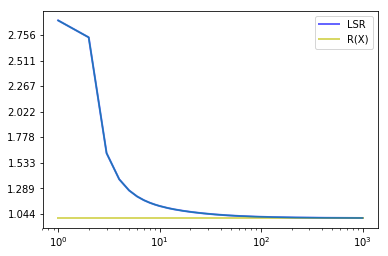

In [6]:
data = np.mat(np.loadtxt('matrix_data.txt')) #read numbers from the matrix_data.txt
x,y=LA.eig(data) #get the eigenvalues of a 
abs_x=np.abs(x)
r=max(abs_x)

iter_totalnum=1000
x=np.zeros((iter_totalnum,10))
seq=np.zeros(iter_totalnum)
v=np.mat(np.ones(np.shape(data)[1])).T
x[0]=(data*v).T
seq[0]=LA.norm(x[0])

for i in range(iter_totalnum-1):
    x[i+1]=(data*(np.mat(x[i]).T)).T
    seq[i+1]=LA.norm(x[i+1])**(1/(i+1))
    
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
a=np.array(range(1,iter_totalnum+1))
ax.plot(a, np.mat(seq).T, 'b-', linewidth=2, label='LSR', alpha=0.6)
ax.plot(a,r*np.ones((iter_totalnum,1)), 'y-', linewidth=2, label='R(X)', alpha=0.6)
ax.set_yticks(np.linspace(0.8, 3, 10))
ax.semilogx(a,np.mat(seq).T)
ax.legend(loc='upper right')
plt.show()

### Exercise 2

Recall that the quadratic map generates time series of the form

$$ x_{t+1} = 4 \, x_t (1 - x_t) $$

for some given $x_0$, and that these trajectories are chaotic.

This means that different initial conditions generate seemingly very different outcomes.

Nevertheless, the regions of the state space where these trajectories spend most of their time are in fact typically invariant to the initial condition.

Illustrate this by generating 100 histograms of time series generated from the quadratic map, with $x_0$ drawn independently from the uniform distribution on $(0, 1)$.  

Do they all look alike?

Try to make your code efficient.



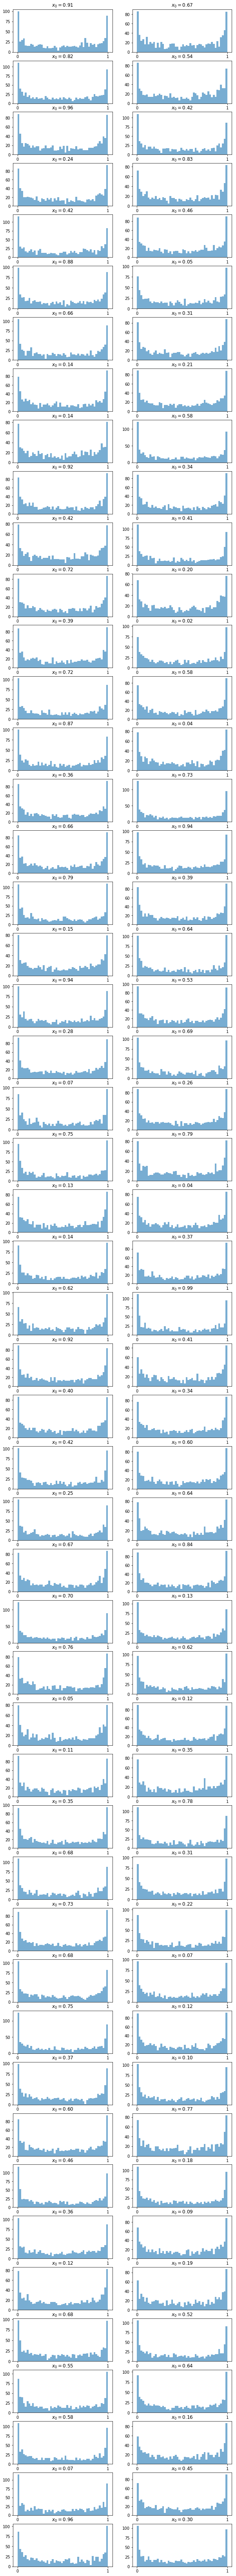

In [51]:
import matplotlib.pyplot as plt
from numba import jit

@jit
def hist_plot(g,x0,ts_length):
    fig, ax = plt.subplots()
    x = np.empty(ts_length)
    x[0] = x0
    rows, cols = 50, 2
    fig, axes = plt.subplots(rows,cols, figsize=(10, 120))
    for i in range(rows): 
        for j in range(cols):
            axes[i, j].hist(x, alpha=0.6, bins=50)
            t = r'$x_0 = {0:.2f}$'.format(x0)
            axes[i, j].set_title(t)
            axes[i, j].set_xticks([0,1])
    plt.show()

x0=np.random.uniform(0,1,1)
ts_length=1000
g = lambda x: 4 * x * (1 - x)
hist_plot(g,x0,ts_length)